In [1]:
from feynml.feynmandiagram import FeynmanDiagram
from feynml.feynml import FeynML, Head, Meta
from feynml.leg import Leg
from feynml.momentum import Momentum
from feynml.propagator import Propagator
from feynml.vertex import Vertex

In [2]:
v1 = Vertex()
v2 = Vertex()

fd = FeynmanDiagram().add(
    v1,v2,
    Propagator(pdgid=21).connect(v1,v2),
    Leg(pdgid=1).with_target(v1).with_incoming().with_momentum(Momentum(name="p_a")),
    Leg(pdgid=-1).with_target(v1).with_incoming().with_momentum(Momentum(name="p_b")),
    Leg(pdgid=2).with_target(v2).with_outgoing().with_momentum(Momentum(name="k_1")),
    Leg(pdgid=-2).with_target(v2).with_outgoing().with_momentum(Momentum(name="k_2")),
    
)

In [3]:
from feynpy.momentum import *
set_missing_momenta(fd)
print(fd.propagators[0].momentum)

Momentum(name='+p_a+p_b', px=None, py=None, pz=None, e=None)


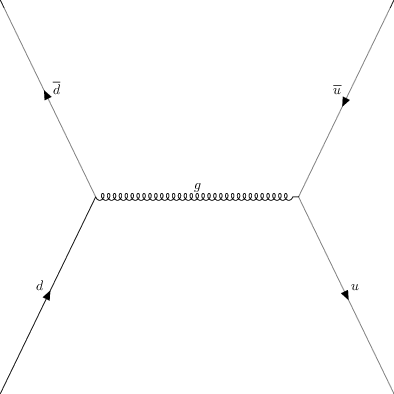

In [4]:
fd

In [5]:
from feynmodel.interface.ufo import load_ufo_model
fm = load_ufo_model("ufo_sm")

In [6]:
fm.vertices[0].particles[0].pdg_code

250

In [7]:
fd.get_connections(v1)

[Propagator(id='Propagator11', pdgid=21, name='g', type='gluon', particle=<Particle: name="g", pdgid=21, mass=0.0 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=Momentum(name='+p_a+p_b', px=None, py=None, pz=None, e=None), source='Vertex8', target='Vertex9'),
 Leg(id='Leg12', pdgid=1, name='d', type='fermion', particle=<Particle: name="d", pdgid=1, mass=4.67 + 0.50 - 0.20 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=Momentum(name='p_a', px=None, py=None, pz=None, e=None), target='Vertex8', x=None, y=None, z=None, sense='incoming', external=None),
 Leg(id='Leg13', pdgid=-1, name='d~', type='anti fermion', particle=<Particle: name="d~", pdgid=-1, mass=4.67 + 0.50 - 0.20 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=Momentum(name='p_b', px=None, py=None, pz=None, e=None), target='Vertex8', x=None, y=None, z=None, sense='incoming', external=None)]

In [8]:
import feynpy as fp

In [9]:
vv2 = fp.find_vertex_in_model(fd,v2,fm)

In [10]:
vv1 = fp.find_vertex_in_model(fd,v1,fm)

In [11]:
vv1.color

['T(3,2,1)']

In [12]:
vv1.couplings

{(0, 0): GC_11}

In [13]:
vv1.particles[0].color

-3

In [14]:
fp.get_vertex_math(fd,v1,fm)

[('complex(0,1)*G',
  'T(GluPropagator11,ColLeg13,ColLeg12)',
  'Gamma(MuPropagator11,SpinLeg13,SpinLeg12)')]

In [15]:
fp.get_vertex_math(fd,v2,fm)

[('complex(0,1)*G',
  'T(GluPropagator11,ColLeg14,ColLeg15)',
  'Gamma(MuPropagator11,SpinLeg14,SpinLeg15)')]

In [16]:
cfd = fd.conjugated()
fp.get_vertex_math(cfd,cfd.vertices[0],fm)

[('complex(0,1)*G',
  'T(GluPropagator26,ColLeg22,ColLeg23)',
  'Gamma(MuPropagator26,SpinLeg22,SpinLeg23)')]

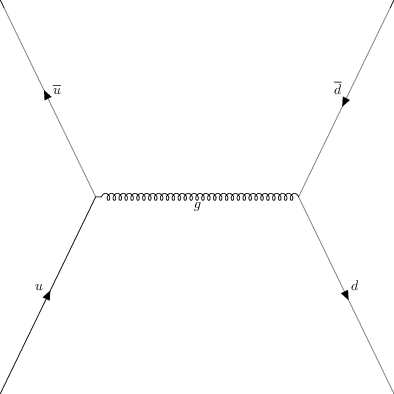

In [17]:
cfd

In [18]:
fp.get_propagator_math(fd,fd.propagators[0],fm)

'Denom(+Mom_p_a+Mom_p_b,ZERO)'

In [19]:
a=fp.feynman_diagram_to_string(fd,fm)
a

'complex(0,1)*G*T(GluPropagator11,ColLeg13,ColLeg12)*Gamma(MuPropagator11,SpinLeg13,SpinLeg12) * complex(0,1)*G*T(GluPropagator11,ColLeg14,ColLeg15)*Gamma(MuPropagator11,SpinLeg14,SpinLeg15) * VC(ColLeg12,Mom_p_a)*u(SpinLeg12,Mom_p_a) * VC(ColLeg13,Mom_p_b)*v(SpinLeg13,Mom_p_b) * VC(ColLeg14,Mom_k_1)*u_bar(SpinLeg14,Mom_k_1) * VC(ColLeg15,Mom_k_2)*v_bar(SpinLeg15,Mom_k_2) * Denom(+Mom_p_a+Mom_p_b,ZERO)'

In [20]:
b=fp.feynman_diagram_to_string(cfd,fm)
b

'complex(0,1)*G*T(GluPropagator26,ColLeg22,ColLeg23)*Gamma(MuPropagator26,SpinLeg22,SpinLeg23) * complex(0,1)*G*T(GluPropagator26,ColLeg25,ColLeg24)*Gamma(MuPropagator26,SpinLeg25,SpinLeg24) * VC(ColLeg22,Mom_p_a)*u_bar(SpinLeg22,Mom_p_a) * VC(ColLeg23,Mom_p_b)*v_bar(SpinLeg23,Mom_p_b) * VC(ColLeg24,Mom_k_1)*u(SpinLeg24,Mom_k_1) * VC(ColLeg25,Mom_k_2)*v(SpinLeg25,Mom_k_2) * Denom(+Mom_p_a+Mom_p_b,ZERO)'

In [21]:
from feynpy.amplitude import *
sa = string_to_sympy(a)
sa

-G**2*Denom(Mom_p_a + Mom_p_b, ZERO)*T(GluPropagator11, ColLeg13, ColLeg12)*T(GluPropagator11, ColLeg14, ColLeg15)*VC(ColLeg12, Mom_p_a)*VC(ColLeg13, Mom_p_b)*VC(ColLeg14, Mom_k_1)*VC(ColLeg15, Mom_k_2)*gamma(MuPropagator11, SpinLeg13, SpinLeg12)*gamma(MuPropagator11, SpinLeg14, SpinLeg15)*u(SpinLeg12, Mom_p_a)*u_bar(SpinLeg14, Mom_k_1)*v(SpinLeg13, Mom_p_b)*v_bar(SpinLeg15, Mom_k_2)

In [22]:
sb = string_to_sympy(b)
sb

-G**2*Denom(Mom_p_a + Mom_p_b, ZERO)*T(GluPropagator26, ColLeg22, ColLeg23)*T(GluPropagator26, ColLeg25, ColLeg24)*VC(ColLeg22, Mom_p_a)*VC(ColLeg23, Mom_p_b)*VC(ColLeg24, Mom_k_1)*VC(ColLeg25, Mom_k_2)*gamma(MuPropagator26, SpinLeg22, SpinLeg23)*gamma(MuPropagator26, SpinLeg25, SpinLeg24)*u(SpinLeg24, Mom_k_1)*u_bar(SpinLeg22, Mom_p_a)*v(SpinLeg25, Mom_k_2)*v_bar(SpinLeg23, Mom_p_b)

In [23]:
m2 = sa*sb
print(m2)

G**4*Denom(Mom_p_a + Mom_p_b, ZERO)**2*T(GluPropagator11, ColLeg13, ColLeg12)*T(GluPropagator11, ColLeg14, ColLeg15)*T(GluPropagator26, ColLeg22, ColLeg23)*T(GluPropagator26, ColLeg25, ColLeg24)*VC(ColLeg12, Mom_p_a)*VC(ColLeg13, Mom_p_b)*VC(ColLeg14, Mom_k_1)*VC(ColLeg15, Mom_k_2)*VC(ColLeg22, Mom_p_a)*VC(ColLeg23, Mom_p_b)*VC(ColLeg24, Mom_k_1)*VC(ColLeg25, Mom_k_2)*gamma(MuPropagator11, SpinLeg13, SpinLeg12)*gamma(MuPropagator11, SpinLeg14, SpinLeg15)*gamma(MuPropagator26, SpinLeg22, SpinLeg23)*gamma(MuPropagator26, SpinLeg25, SpinLeg24)*u(SpinLeg12, Mom_p_a)*u(SpinLeg24, Mom_k_1)*u_bar(SpinLeg14, Mom_k_1)*u_bar(SpinLeg22, Mom_p_a)*v(SpinLeg13, Mom_p_b)*v(SpinLeg25, Mom_k_2)*v_bar(SpinLeg15, Mom_k_2)*v_bar(SpinLeg23, Mom_p_b)


In [24]:
from feynpy.lorentz import *
m2d=apply_dirac_trick(m2)
print(m2d)
m2d

G**4*Denom(Mom_p_a + Mom_p_b, ZERO)**2*P(_di, Mom_p_a)**2*P(_di, Mom_k_1)**2*P(_dj, Mom_p_b)**2*P(_dj, Mom_k_2)**2*T(GluPropagator11, ColLeg13, ColLeg12)*T(GluPropagator11, ColLeg14, ColLeg15)*T(GluPropagator26, ColLeg22, ColLeg23)*T(GluPropagator26, ColLeg25, ColLeg24)*VC(ColLeg12, Mom_p_a)*VC(ColLeg13, Mom_p_b)*VC(ColLeg14, Mom_k_1)*VC(ColLeg15, Mom_k_2)*VC(ColLeg22, Mom_p_a)*VC(ColLeg23, Mom_p_b)*VC(ColLeg24, Mom_k_1)*VC(ColLeg25, Mom_k_2)*gamma(MuPropagator11, SpinLeg13, SpinLeg12)*gamma(MuPropagator11, SpinLeg14, SpinLeg15)*gamma(MuPropagator26, SpinLeg22, SpinLeg23)*gamma(MuPropagator26, SpinLeg25, SpinLeg24)*gamma_id(SpinLeg12, SpinLeg22)*gamma_id(SpinLeg13, SpinLeg23)*gamma_id(SpinLeg24, SpinLeg14)*gamma_id(SpinLeg25, SpinLeg15) - G**4*Denom(Mom_p_a + Mom_p_b, ZERO)**2*P(_di, Mom_p_a)**2*P(_di, Mom_k_1)**2*P(_dj, Mom_p_b)**2*P(_dj, Mom_k_2)*T(GluPropagator11, ColLeg13, ColLeg12)*T(GluPropagator11, ColLeg14, ColLeg15)*T(GluPropagator26, ColLeg22, ColLeg23)*T(GluPropagator26, Col

G**4*Denom(Mom_p_a + Mom_p_b, ZERO)**2*P(_di, Mom_p_a)**2*P(_di, Mom_k_1)**2*P(_dj, Mom_p_b)**2*P(_dj, Mom_k_2)**2*T(GluPropagator11, ColLeg13, ColLeg12)*T(GluPropagator11, ColLeg14, ColLeg15)*T(GluPropagator26, ColLeg22, ColLeg23)*T(GluPropagator26, ColLeg25, ColLeg24)*VC(ColLeg12, Mom_p_a)*VC(ColLeg13, Mom_p_b)*VC(ColLeg14, Mom_k_1)*VC(ColLeg15, Mom_k_2)*VC(ColLeg22, Mom_p_a)*VC(ColLeg23, Mom_p_b)*VC(ColLeg24, Mom_k_1)*VC(ColLeg25, Mom_k_2)*gamma(MuPropagator11, SpinLeg13, SpinLeg12)*gamma(MuPropagator11, SpinLeg14, SpinLeg15)*gamma(MuPropagator26, SpinLeg22, SpinLeg23)*gamma(MuPropagator26, SpinLeg25, SpinLeg24)*gamma_id(SpinLeg12, SpinLeg22)*gamma_id(SpinLeg13, SpinLeg23)*gamma_id(SpinLeg24, SpinLeg14)*gamma_id(SpinLeg25, SpinLeg15) - G**4*Denom(Mom_p_a + Mom_p_b, ZERO)**2*P(_di, Mom_p_a)**2*P(_di, Mom_k_1)**2*P(_dj, Mom_p_b)**2*P(_dj, Mom_k_2)*T(GluPropagator11, ColLeg13, ColLeg12)*T(GluPropagator11, ColLeg14, ColLeg15)*T(GluPropagator26, ColLeg22, ColLeg23)*T(GluPropagator26, Col

In [25]:
print(m2)
print()
print(m2d)

G**4*Denom(Mom_p_a + Mom_p_b, ZERO)**2*T(GluPropagator11, ColLeg13, ColLeg12)*T(GluPropagator11, ColLeg14, ColLeg15)*T(GluPropagator26, ColLeg22, ColLeg23)*T(GluPropagator26, ColLeg25, ColLeg24)*VC(ColLeg12, Mom_p_a)*VC(ColLeg13, Mom_p_b)*VC(ColLeg14, Mom_k_1)*VC(ColLeg15, Mom_k_2)*VC(ColLeg22, Mom_p_a)*VC(ColLeg23, Mom_p_b)*VC(ColLeg24, Mom_k_1)*VC(ColLeg25, Mom_k_2)*gamma(MuPropagator11, SpinLeg13, SpinLeg12)*gamma(MuPropagator11, SpinLeg14, SpinLeg15)*gamma(MuPropagator26, SpinLeg22, SpinLeg23)*gamma(MuPropagator26, SpinLeg25, SpinLeg24)*u(SpinLeg12, Mom_p_a)*u(SpinLeg24, Mom_k_1)*u_bar(SpinLeg14, Mom_k_1)*u_bar(SpinLeg22, Mom_p_a)*v(SpinLeg13, Mom_p_b)*v(SpinLeg25, Mom_k_2)*v_bar(SpinLeg15, Mom_k_2)*v_bar(SpinLeg23, Mom_p_b)

G**4*Denom(Mom_p_a + Mom_p_b, ZERO)**2*P(_di, Mom_p_a)**2*P(_di, Mom_k_1)**2*P(_dj, Mom_p_b)**2*P(_dj, Mom_k_2)**2*T(GluPropagator11, ColLeg13, ColLeg12)*T(GluPropagator11, ColLeg14, ColLeg15)*T(GluPropagator26, ColLeg22, ColLeg23)*T(GluPropagator26, ColLeg25,

In [26]:

from feynpy.color import *
m2c = apply_color(apply_color(sa)*apply_color(sb))
m2c

G**4*Denom(Mom_p_a + Mom_p_b, ZERO)**2*VC(ColLeg12, Mom_p_a)*VC(ColLeg13, Mom_p_b)*VC(ColLeg14, Mom_k_1)*VC(ColLeg15, Mom_k_2)*VC(ColLeg22, Mom_p_a)*VC(ColLeg23, Mom_p_b)*VC(ColLeg24, Mom_k_1)*VC(ColLeg25, Mom_k_2)*delta_c(ColLeg13, ColLeg15)*delta_c(ColLeg14, ColLeg12)*delta_c(ColLeg22, ColLeg24)*delta_c(ColLeg25, ColLeg23)*gamma(MuPropagator11, SpinLeg13, SpinLeg12)*gamma(MuPropagator11, SpinLeg14, SpinLeg15)*gamma(MuPropagator26, SpinLeg22, SpinLeg23)*gamma(MuPropagator26, SpinLeg25, SpinLeg24)*u(SpinLeg12, Mom_p_a)*u(SpinLeg24, Mom_k_1)*u_bar(SpinLeg14, Mom_k_1)*u_bar(SpinLeg22, Mom_p_a)*v(SpinLeg13, Mom_p_b)*v(SpinLeg25, Mom_k_2)*v_bar(SpinLeg15, Mom_k_2)*v_bar(SpinLeg23, Mom_p_b)/4 - G**4*Denom(Mom_p_a + Mom_p_b, ZERO)**2*VC(ColLeg12, Mom_p_a)*VC(ColLeg13, Mom_p_b)*VC(ColLeg14, Mom_k_1)*VC(ColLeg15, Mom_k_2)*VC(ColLeg22, Mom_p_a)*VC(ColLeg23, Mom_p_b)*VC(ColLeg24, Mom_k_1)*VC(ColLeg25, Mom_k_2)*delta_c(ColLeg13, ColLeg12)*delta_c(ColLeg14, ColLeg15)*delta_c(ColLeg22, ColLeg24)*de

In [27]:
m2cd=apply_dirac_trick(m2c)

In [28]:
print(m2cd)

G**4*Denom(Mom_p_a + Mom_p_b, ZERO)**2*P(_di, Mom_p_a)**2*P(_di, Mom_k_1)**2*P(_dj, Mom_p_b)**2*P(_dj, Mom_k_2)**2*VC(ColLeg12, Mom_p_a)*VC(ColLeg13, Mom_p_b)*VC(ColLeg14, Mom_k_1)*VC(ColLeg15, Mom_k_2)*VC(ColLeg22, Mom_p_a)*VC(ColLeg23, Mom_p_b)*VC(ColLeg24, Mom_k_1)*VC(ColLeg25, Mom_k_2)*delta_c(ColLeg13, ColLeg15)*delta_c(ColLeg14, ColLeg12)*delta_c(ColLeg22, ColLeg24)*delta_c(ColLeg25, ColLeg23)*gamma(MuPropagator11, SpinLeg13, SpinLeg12)*gamma(MuPropagator11, SpinLeg14, SpinLeg15)*gamma(MuPropagator26, SpinLeg22, SpinLeg23)*gamma(MuPropagator26, SpinLeg25, SpinLeg24)*gamma_id(SpinLeg12, SpinLeg22)*gamma_id(SpinLeg13, SpinLeg23)*gamma_id(SpinLeg24, SpinLeg14)*gamma_id(SpinLeg25, SpinLeg15)/4 - G**4*Denom(Mom_p_a + Mom_p_b, ZERO)**2*P(_di, Mom_p_a)**2*P(_di, Mom_k_1)**2*P(_dj, Mom_p_b)**2*P(_dj, Mom_k_2)*VC(ColLeg12, Mom_p_a)*VC(ColLeg13, Mom_p_b)*VC(ColLeg14, Mom_k_1)*VC(ColLeg15, Mom_k_2)*VC(ColLeg22, Mom_p_a)*VC(ColLeg23, Mom_p_b)*VC(ColLeg24, Mom_k_1)*VC(ColLeg25, Mom_k_2)*delta

In [ ]:
    wa, wb, wc, wd, wi, wj, wk, ww,wx = symbols("wa wb wc wd wi wj wk ww wx", cls=Wild)
    (
        d1,
        d2,
        d3,
        d4,
        d5,
        d6,
        d7,
        d8,
    ) = symbols("d1 d2 d3 d4 d5 d6 d7 d8", cls=Dummy)
    m2cd.match( ww * T(wa, wj, wi) * delta_c(wi, wk)+wx)

In [29]:
m2cdg = apply_5_gamma(m2cd)
print(m2cdg)

True


KeyboardInterrupt: 

In [ ]:
m2cdg = apply_4_gamma(m2cd)
print(m2cdg)

In [ ]:
m2cdg = apply_3_gamma(m2cd)
print(m2cdg)

In [ ]:
m2cdg = apply_2_gamma(m2cd)
print(m2cdg)